__Problem__: Given a cats and dogs pictures. Identify the
whether a given picture is of a cat or dog.

- Download the pictures

In [2]:
import tensorflow as tf
import os
import urllib.request
from zipfile import ZipFile


In [27]:
filename = 'c:/Dinesh/github-proj/tensorflow-cert/data/cats_and_dogs_filtered.zip'
os.remove(filename)
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

urllib.request.urlretrieve(url, filename)

('c:/Dinesh/github-proj/tensorflow-cert/data/cats_and_dogs_filtered.zip',
 <http.client.HTTPMessage at 0x2e3855f50b8>)

- Unzip the file in data folder


In [30]:
dir_path_to_zip="c:/Dinesh/github-proj/tensorflow-cert/data/cats_and_dogs_filtered.zip"
with ZipFile(dir_path_to_zip,mode='r') as z:
    z.extractall(path='c:/Dinesh/github-proj/tensorflow-cert/data/')




- Delete the zip file


In [ ]:
os.remove(dir_path_to_zip)

__Explore the images__
- find the number of cats and dogs in train and test
- show some pictures in 4X4 grid



In [7]:
base_dir='c:/Dinesh/github-proj/tensorflow-cert/data/cats_and_dogs_filtered/'
train_dog_dir=base_dir+'train/dogs'
train_cat_dir=base_dir+'train/cats'
valid_dog_dir=base_dir+'validation/dogs'
valid_cat_dir=base_dir+'validation/cats'

print( "\n Train Dogs:",len(os.listdir(train_dog_dir)), \
       "\n Train cats: ",len(os.listdir(train_cat_dir)), \
       "\n Validation Dogs",len(os.listdir(valid_dog_dir)), \
       "\n Validation cats",len(os.listdir(valid_cat_dir))
    )
train_dog_files=os.listdir(train_dog_dir)
train_cat_files=os.listdir(train_cat_dir)
print("\n Sample dog file names: ", train_dog_files[:5],
      "\n sample cat file names: ", train_cat_files[:5])



 Train Dogs: 1000 
 Train cats:  1000 
 Validation Dogs 500 
 Validation cats 500

 Sample dog file names:  ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg'] 
 sample cat file names:  ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']


In [4]:
rows, cols=4,4
counter=0

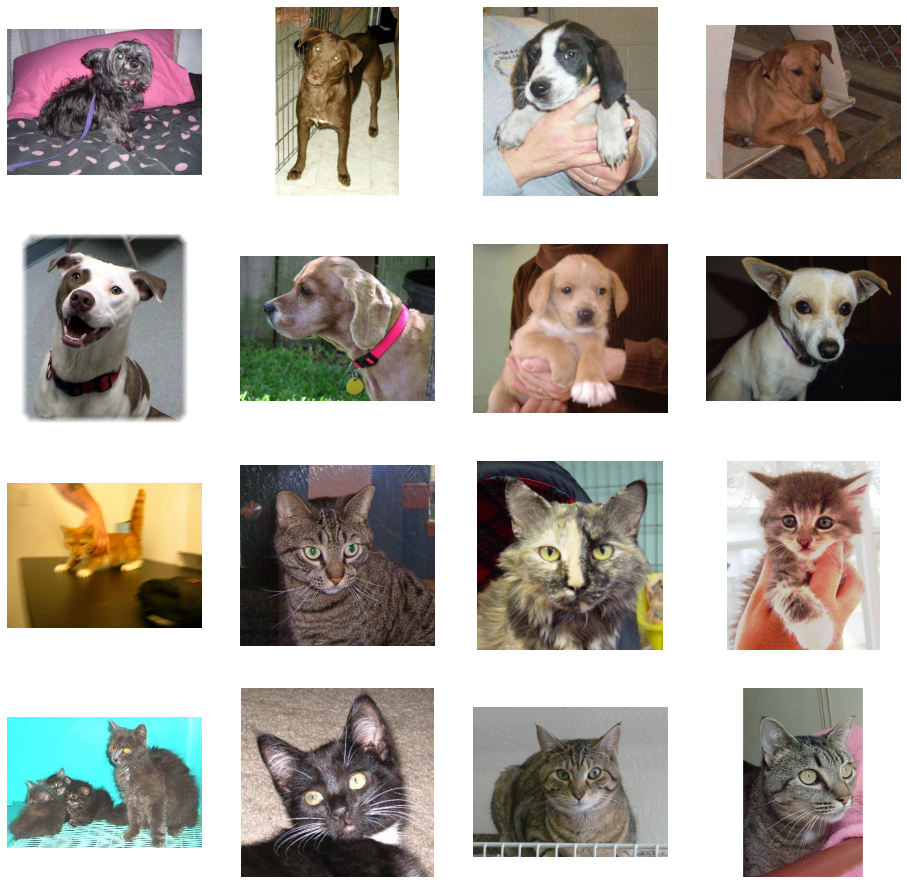

In [15]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import numpy as np

width=10
height=10
fig=plt.gcf()
fig.set_size_inches(cols*4, rows*4)
pic_index=8
next_cat_pix = [os.path.join(train_dog_dir, fname)
                for fname in train_dog_files[ pic_index-8:pic_index]
               ]

next_dog_pix = [os.path.join(train_cat_dir, fname)
                for fname in train_cat_files[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



Import tensorflow, create model --> compile --> feed the images --> Train -->Evaluate


In [18]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [25]:
model.compile(optimizer='rmsprop',

              , loss='binary_crossentropy',
              metrics=['accuracy'])


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(base_dir+'/train',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
valid_generator = train_datagen.flow_from_directory(base_dir+'/validation',
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
#Train the images
history = model.fit(train_generator
                    , validation_data=valid_generator,
                    epochs=5,
                    steps_per_epoch=100,
                    validation_steps=50,
                    verbose=2)

Epoch 1/5
100/100 - 48s - loss: 0.8139 - accuracy: 0.5800 - val_loss: 0.6164 - val_accuracy: 0.6480
Epoch 2/5
100/100 - 47s - loss: 0.6264 - accuracy: 0.6740 - val_loss: 0.6005 - val_accuracy: 0.6810
Epoch 3/5
100/100 - 47s - loss: 0.5442 - accuracy: 0.7330 - val_loss: 0.7998 - val_accuracy: 0.6150
Epoch 4/5
100/100 - 47s - loss: 0.4599 - accuracy: 0.7760 - val_loss: 0.5785 - val_accuracy: 0.7120
Epoch 5/5
100/100 - 47s - loss: 0.3805 - accuracy: 0.8335 - val_loss: 0.6207 - val_accuracy: 0.7150


Text(0.5, 1.0, 'Training and validation loss')

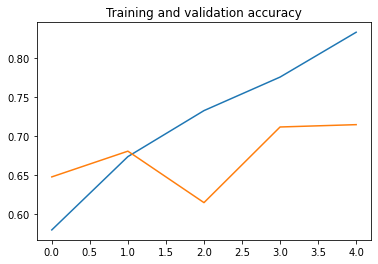

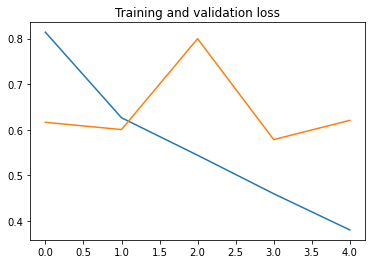

In [28]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

